# Housing price

Dane pochodzą z Kaggle https://www.kaggle.com/c/home-data-for-ml-course/overview.

Obejmują 79 zmiennych objaśniających cechy domów mieszkalnych w Ames w stanie Iowa.
Poniższy notebook powstał na bazie wiedzy, którą wyniosłam z warsztatów z analizy danych w Pythonie przeprowadzonych w marcu 2021 r. przez wspaniałe dziewczyny z **Women in Technology**.
https://womenintechnology.pl/

Serdecznie dziękuję za Waszą bezinteresowną pracę przy przygotowaniu i przeprowadzeniu warsztatów!

## Import packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sklearn.metrics as metrics


## Reading data

In [2]:

test_data=pd.read_csv('test.csv')
#train_data=pd.read_csv('train.csv')
#submission=pd.read_csv('sample_submission.csv')

In [3]:
print(train_data.head())
print(train_data.describe())
print(train_data.info())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
#copy data to save original data
train=train_data.copy()

In [5]:
# Replace nan into 0 in numerical features

for col in train.columns:
    if train[col].dtype !='object':
        train[col].replace(np.nan,0)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Visualisations

In [ ]:
# Scatter plot Living Area vs. Sale Price
plt.figure(figsize=(15,10))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='Neighborhood', data=train)
plt.title('Living Area vs. Sale Price');

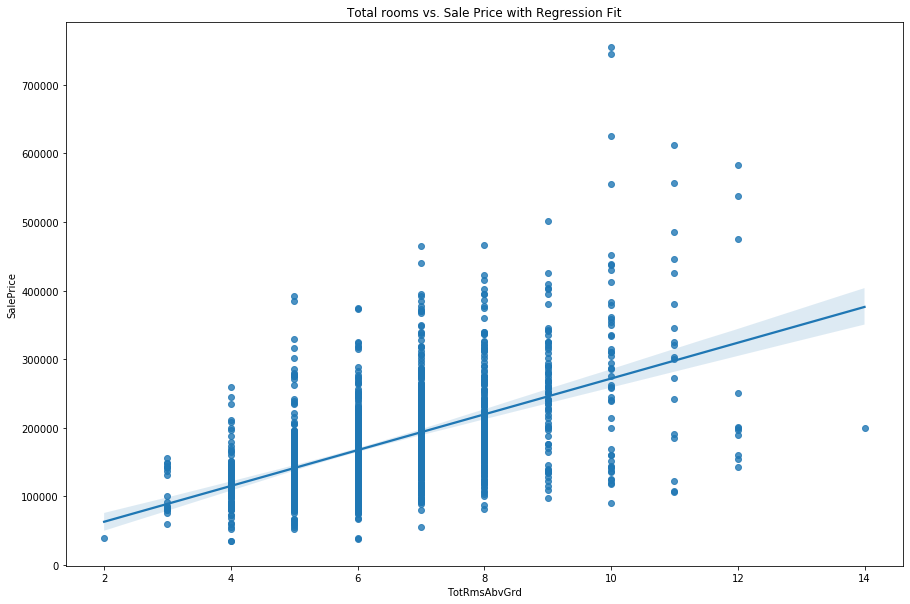

In [11]:
plt.figure(figsize=(15,10))
sns.regplot(x='TotRmsAbvGrd', y='SalePrice', data=train)
plt.title('Total rooms vs. Sale Price with Regression Fit');

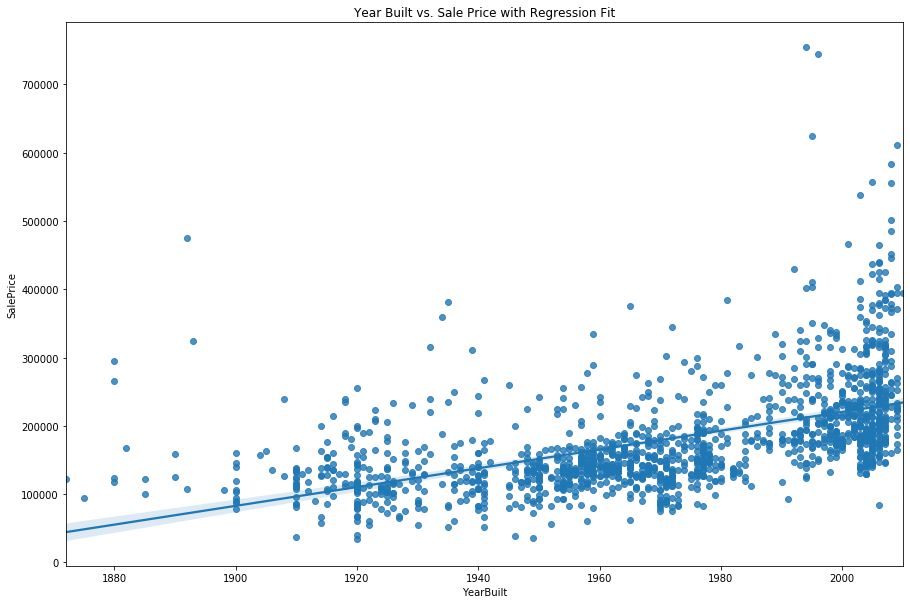

In [21]:
plt.figure(figsize=(15,10))
sns.regplot(x='YearBuilt', y='SalePrice', data=train)
plt.title('Year Built vs. Sale Price with Regression Fit');

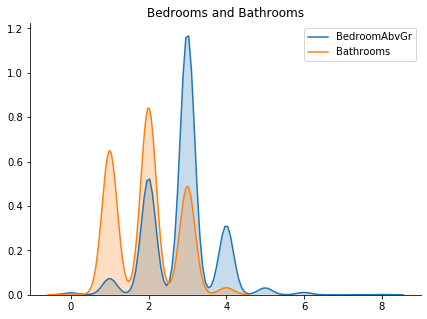

In [27]:
f, ax = plt.subplots(figsize=(7, 5))
train['Bathrooms']=train.FullBath+train.HalfBath
sns.despine(f)
sns.kdeplot(train.BedroomAbvGr, shade=True)
sns.kdeplot(train.Bathrooms, shade=True)
plt.title('Bedrooms and Bathrooms');
plt.show()

In [6]:
## Interactive scatter plot
from bqplot import pyplot as pplt
fig = pplt.figure()
fig.layout.height = "400px"
fig.layout.width = "800px"
pplt.scatter(train.YearBuilt,train.SalePrice)
pplt.xlabel("Year built")
pplt.ylabel("Sale Price")
pplt.show()

## Simple dashboard

In [ ]:
#pip install jupyter-dash

In [19]:
# comparison of the relationship between the construction year and the sale price in 2006 and 2010
# using Plotly

import dash
from jupyter_dash import JupyterDash
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go




In [22]:
data2006 = train.loc[train['YrSold'] == 2006]
data2008 = train.loc[train['YrSold'] == 2008]
data2010 = train.loc[train['YrSold'] == 2010]
trace1 = go.Scatter(
                    x = data2006.YearBuilt,
                    y = data2006.SalePrice,
                    mode = "markers",
                    name = "Year built vs SalePrice - 2006",
                    marker = dict(color = 'red'),
                    text= "Year built vs SalePrice - 2006")
trace2 = go.Scatter(
                    x = data2008.YearBuilt,
                    y = data2008.SalePrice,
                    mode = "markers",
                    name = "Year built vs SalePrice - 2008",
                    marker = dict(color = 'green'),
                    text= "Year built vs SalePrice - 2008")

trace3 = go.Scatter(
                    x = data2010.YearBuilt,
                    y = data2010.SalePrice,
                    mode = "markers",
                    name = "Year built vs SalePrice - 2010",
                    marker = dict(color = 'blue'),
                    text= "Year built vs SalePrice - 2010")

trace4 = go.Histogram(
                    x=train.SalePrice,
                    name = "Sale Price",
                    marker = dict(color = 'purple'),
                    text = "Sale Price")

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
app.layout = html.Div(children=[
    html.H1(children='Ames Housing Prices: Year built vs SalePrice'),
    html.Div(children='''Kaggle tabular kompetition'''),
    dcc.Graph(
        id='example-graph',
        figure={
            'data': [trace1, trace2, trace3],
            'layout':
            go.Layout(title='Scatter plots for different years')
        }),
    dcc.Graph(
        id='hist-graph',
        figure={
            'data': [trace4],
            'layout':
            go.Layout(title='Histogram of SalePrice')
        })
])

app.run_server(mode="inline")